<a href="https://colab.research.google.com/github/YshGupta/CV_Assignment_1/blob/main/QUE_1_EE511_B21147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import cv2
import numpy as np


In [67]:
#loading an RGB image

image_path = "birds.JPEG"
rgb_image = cv2.imread(image_path)
# rgb_image = cv2.resize(rgb_image , (256 , 256))      // comment out this if in question it is aksed to resize the original image as well ( to 256 x 256 )


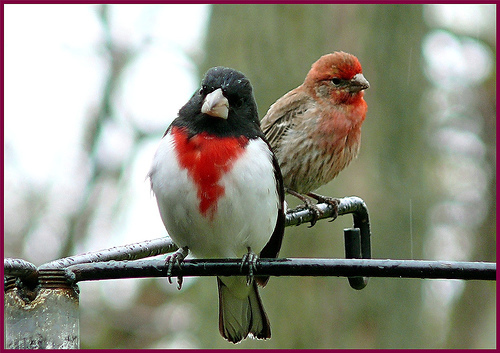

In [68]:
#showing the loaded
from google.colab.patches import cv2_imshow
cv2_imshow(rgb_image)

In [69]:
#converting to gray image
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

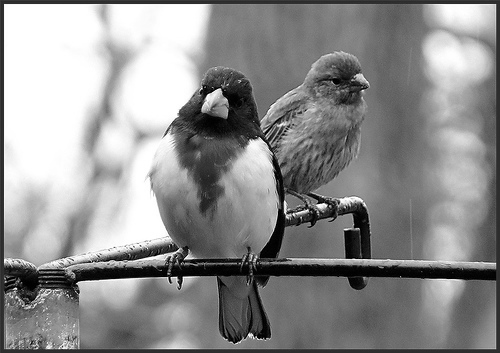

In [70]:
#showing the gray image and resising to 256 x 256
cv2_imshow(gray_image)
gray_image = cv2.resize(gray_image, (256,256))

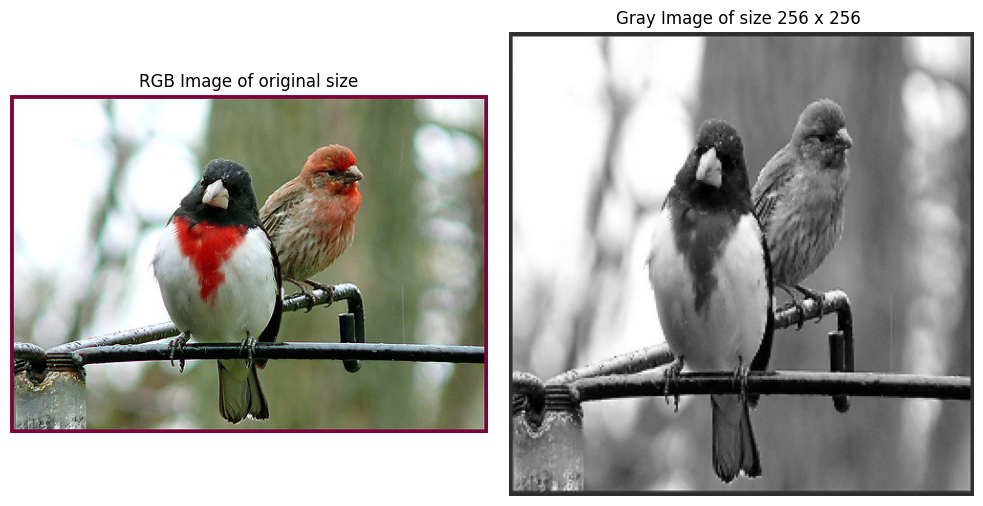

In [72]:
# 2) displaying the images side by side using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('RGB Image of original size')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Gray Image of size 256 x 256 ')
axes[1].axis('off')

plt.tight_layout()

plt.show()

In [73]:
# saving the gray image
cv2.imwrite('birds.jpg', gray_image)

True

In [111]:
#making function to flip the image horizontallly and vertically

def flip_horizontal(img):
  width, height = img.shape[1] , img.shape[0]
  flipped_image = np.zeros_like(img)
  for y in range(height):
      for x in range(width):
          flipped_image[y, width - x - 1] = img[y, x]

  return flipped_image

def flip_vertical(img):

  width, height = img.shape[1], img.shape[0]
  flipped_image = np.zeros_like(img)

  for y in range(height):
      flipped_image[height - y - 1] = img[y]

  return flipped_image



flipped_horizontal = flip_horizontal(rgb_image)
flipped_vertical = flip_vertical(rgb_image)

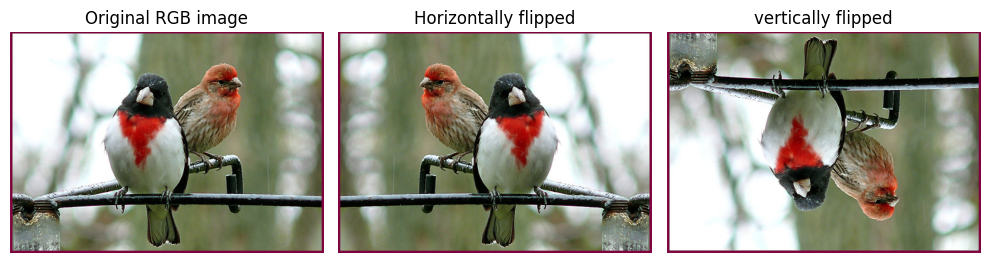

In [89]:
#plotting images side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original RGB image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB))
axes[1].set_title('Horizontally flipped')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB))
axes[2].set_title('vertically flipped')
axes[2].axis('off')

plt.tight_layout()

plt.show()

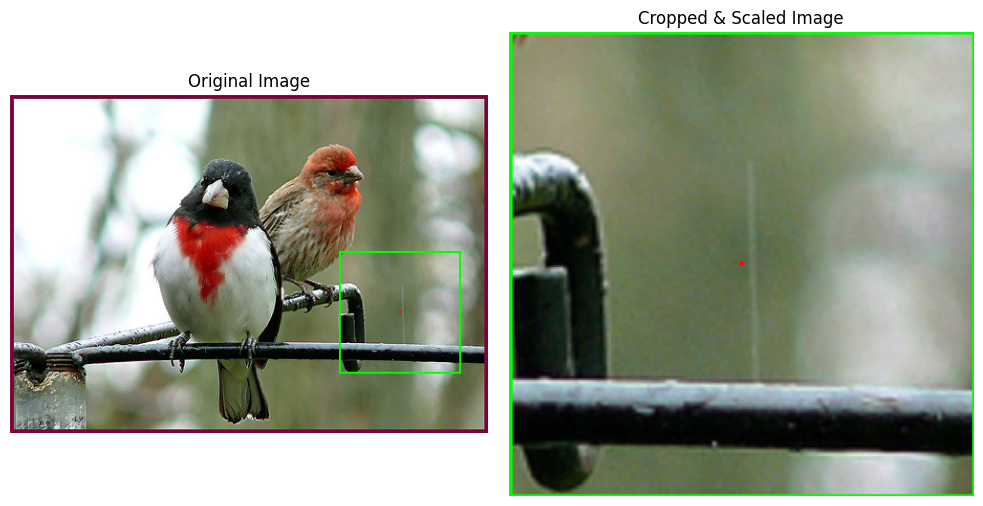

In [106]:
#cropping image randomly by slicing with size as 128 x 128 and then marking rectangles and center point to both images
crop_size = 128
scale_size = 256

height, width, _ = rgb_image.shape

x1 = np.random.randint(0, width - crop_size)
y1 = np.random.randint(0, height - crop_size)
x2 = x1 + crop_size
y2 = y1 + crop_size

cropped_image = rgb_image[y1:y2, x1:x2];  # slicing
cropped_scaled_image = cv2.resize( cropped_image, (scale_size, scale_size))

rgb_image_with_rectangle = rgb_image.copy()
rgb_image_with_rectangle[y1:y2, x1:x1 + 2, :] = [0, 255, 0]
rgb_image_with_rectangle[y1:y2, x2 - 2:x2, :] = [0, 255, 0]
rgb_image_with_rectangle[y1:y1 + 2, x1:x2, :] = [0, 255, 0]
rgb_image_with_rectangle[y2 - 2:y2, x1:x2, :] = [0, 255, 0]

cropped_scaled_image_with_rectangle = cropped_scaled_image.copy()
cropped_scaled_image_with_rectangle[:2, :, :] = [0, 255, 0]
cropped_scaled_image_with_rectangle[-2:, :, :] = [0, 255, 0]
cropped_scaled_image_with_rectangle[:, :2, :] = [0, 255, 0]
cropped_scaled_image_with_rectangle[:, -2:, :] = [0, 255, 0]
cropped_scaled_image_with_rectangle = cropped_scaled_image.copy()
cv2.rectangle(cropped_scaled_image_with_rectangle, (0, 0), (scale_size, scale_size), (0, 255, 0), 2)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
center_y = int((y1 + y2) / 2)
center_x = int(( x1 + x2 ) / 2)
rgb_image_with_rectangle[ center_y -1:center_y + 1 , center_x -1 : center_x + 1 , :] = [0 , 0 , 255 ]

height_cropped_scaled , width_cropped_scaled , _ =  cropped_scaled_image_with_rectangle.shape;
center_y_sclaed = int(( height_cropped_scaled )/2 )
center_x_scaled = int(width_cropped_scaled /2)
cropped_scaled_image_with_rectangle[  center_y_sclaed - 1 : center_y_sclaed + 1 , center_x_scaled -1 : center_x_scaled + 1 , : ] = [ 0 , 0 , 255]


axes[0].imshow(cv2.cvtColor(rgb_image_with_rectangle, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(cropped_scaled_image_with_rectangle, cv2.COLOR_BGR2RGB))
axes[1].set_title('Cropped & Scaled Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()


(353, 500, 3)